# Data Investigation

In [ ]:
#Importing the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import SGD, Adam, RMSprop , Adagrad , Adadelta
from sklearn.metrics import roc_auc_score, accuracy_score
from tensorflow.keras.layers import Dropout

#Fix seed number for reproducability
tf.random.set_seed(1234)

In [ ]:
#Load the data

df=pd.read_csv('/content/train.csv.zip')
df_test=pd.read_csv('/content/test.csv.zip')

df.head(5)

,id,species,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,1,Acer_Opalus,0.007812,0.023438,0.023438,0.003906,0.011719,0.009766,0.027344,0.0,...,0.007812,0.000000,0.002930,0.002930,0.035156,0.0,0.0,0.004883,0.000000,0.025391
1,2,Pterocarya_Stenoptera,0.005859,0.000000,0.031250,0.015625,0.025391,0.001953,0.019531,0.0,...,0.000977,0.000000,0.000000,0.000977,0.023438,0.0,0.0,0.000977,0.039062,0.022461
2,3,Quercus_Hartwissiana,0.005859,0.009766,0.019531,0.007812,0.003906,0.005859,0.068359,0.0,...,0.154300,0.000000,0.005859,0.000977,0.007812,0.0,0.0,0.000000,0.020508,0.002930
3,5,Tilia_Tomentosa,0.000000,0.003906,0.023438,0.005859,0.021484,0.019531,0.023438,0.0,...,0.000000,0.000977,0.000000,0.000000,0.020508,0.0,0.0,0.017578,0.000000,0.047852
4,6,Quercus_Variabilis,0.005859,0.003906,0.048828,0.009766,0.013672,0.015625,0.005859,0.0,...,0.096680,0.000000,0.021484,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.031250


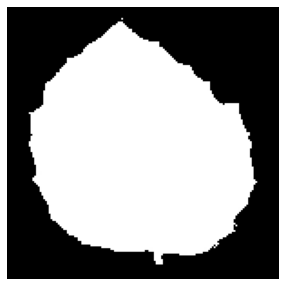

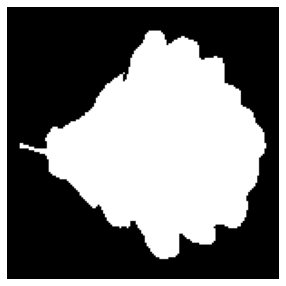

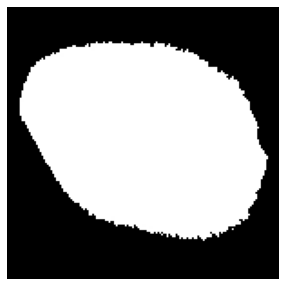

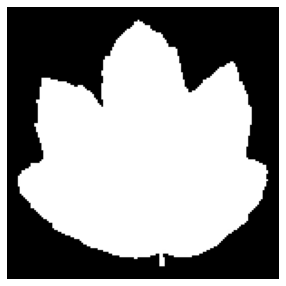

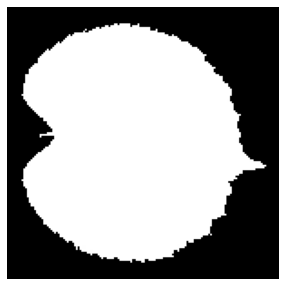

In [ ]:
#Printing some images of the dataset
import glob
from matplotlib import image
from keras.preprocessing import image

pathes  = glob.glob('/content/images/*.jpg')

for fn in pathes:
  fig = plt.figure(figsize=(5,5))
  path = fn
  img = image.load_img(path, target_size=(150,150))
  plt.axis('off')
  plt.imshow(img)
  plt.show()

In [ ]:
df_test.head(5)

,id,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,4,0.019531,0.009766,0.078125,0.011719,0.003906,0.015625,0.005859,0.0,0.005859,...,0.006836,0.000000,0.015625,0.000977,0.015625,0.0,0.0,0.000000,0.003906,0.053711
1,7,0.007812,0.005859,0.064453,0.009766,0.003906,0.013672,0.007812,0.0,0.033203,...,0.000000,0.000000,0.006836,0.001953,0.013672,0.0,0.0,0.000977,0.037109,0.044922
2,9,0.000000,0.000000,0.001953,0.021484,0.041016,0.000000,0.023438,0.0,0.011719,...,0.128910,0.000000,0.000977,0.000000,0.000000,0.0,0.0,0.015625,0.000000,0.000000
3,12,0.000000,0.000000,0.009766,0.011719,0.017578,0.000000,0.003906,0.0,0.003906,...,0.012695,0.015625,0.002930,0.036133,0.013672,0.0,0.0,0.089844,0.000000,0.008789
4,13,0.001953,0.000000,0.015625,0.009766,0.039062,0.000000,0.009766,0.0,0.005859,...,0.000000,0.042969,0.016602,0.010742,0.041016,0.0,0.0,0.007812,0.009766,0.007812


In [ ]:
#Dataframe size

df.shape

(990, 194)

In [ ]:
#Describe the data

df.describe()

,id,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
count,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,...,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000
mean,799.595960,0.017412,0.028539,0.031988,0.023280,0.014264,0.038579,0.019202,0.001083,0.007167,...,0.036501,0.005024,0.015944,0.011586,0.016108,0.014017,0.002688,0.020291,0.008989,0.019420
std,452.477568,0.019739,0.038855,0.025847,0.028411,0.018390,0.052030,0.017511,0.002743,0.008933,...,0.063403,0.019321,0.023214,0.025040,0.015335,0.060151,0.011415,0.039040,0.013791,0.022768
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,415.250000,0.001953,0.001953,0.013672,0.005859,0.001953,0.000000,0.005859,0.000000,0.001953,...,0.000000,0.000000,0.000977,0.000000,0.004883,0.000000,0.000000,0.000000,0.000000,0.000977
50%,802.500000,0.009766,0.011719,0.025391,0.013672,0.007812,0.015625,0.015625,0.000000,0.005859,...,0.004883,0.000000,0.005859,0.000977,0.012695,0.000000,0.000000,0.003906,0.002930,0.011719
75%,1195.500000,0.025391,0.041016,0.044922,0.029297,0.017578,0.056153,0.029297,0.000000,0.007812,...,0.043701,0.000000,0.022217,0.009766,0.021484,0.000000,0.000000,0.023438,0.012695,0.029297
max,1584.000000,0.087891,0.205080,0.156250,0.169920,0.111330,0.310550,0.091797,0.031250,0.076172,...,0.429690,0.202150,0.172850,0.200200,0.106450,0.578130,0.151370,0.375980,0.086914,0.141600


In [ ]:
#Plotting histogram for the whole dataframe
df.hist(figsize=(200,200));

In [ ]:
#Checking the count of values of every column
for clmn in range(df.shape[1]):
    print(df.columns[clmn])
    print(df[df.columns[clmn]].value_counts())
    print("------------------------")

id
1       1
1027    1
1031    1
1032    1
1034    1
       ..
550     1
551     1
552     1
553     1
1584    1
Name: id, Length: 990, dtype: int64
------------------------
species
Acer_Opalus                    10
Crataegus_Monogyna             10
Acer_Mono                      10
Magnolia_Heptapeta             10
Acer_Capillipes                10
                               ..
Alnus_Rubra                    10
Rhododendron_x_Russellianum    10
Cytisus_Battandieri            10
Liriodendron_Tulipifera        10
Sorbus_Aria                    10
Name: species, Length: 99, dtype: int64
------------------------
margin1
0.000000    203
0.001953    105
0.003906     61
0.005859     51
0.007812     47
0.009766     41
0.011719     39
0.015625     33
0.017578     33
0.013672     33
0.025391     26
0.021484     26
0.019531     26
0.023438     23
0.027344     18
0.029297     17
0.050781     15
0.060547     15
0.033203     15
0.037109     14
0.052734     13
0.035156     12
0.031250     11
0.0

In [ ]:
#Checking nulls
df.isnull().any().value_counts()

False    194
dtype: int64

In [ ]:
#Checking duplicates
df.duplicated().value_counts()

False    990
dtype: int64

In [ ]:
# For starters we'll drop the id column as it does not provide meaningful information to our data
df.drop('id',axis=1,inplace=True)
df_test.drop('id',axis=1,inplace=True)

In [ ]:
#Checking unique values of species
print(df['species'].unique())

print(df['species'].nunique())

['Acer_Opalus' 'Pterocarya_Stenoptera' 'Quercus_Hartwissiana'
 'Tilia_Tomentosa' 'Quercus_Variabilis' 'Magnolia_Salicifolia'
 'Quercus_Canariensis' 'Quercus_Rubra' 'Quercus_Brantii' 'Salix_Fragilis'
 'Zelkova_Serrata' 'Betula_Austrosinensis' 'Quercus_Pontica'
 'Quercus_Afares' 'Quercus_Coccifera' 'Fagus_Sylvatica' 'Phildelphus'
 'Acer_Palmatum' 'Quercus_Pubescens' 'Populus_Adenopoda' 'Quercus_Trojana'
 'Alnus_Sieboldiana' 'Quercus_Ilex' 'Arundinaria_Simonii'
 'Acer_Platanoids' 'Quercus_Phillyraeoides' 'Cornus_Chinensis'
 'Liriodendron_Tulipifera' 'Cytisus_Battandieri'
 'Rhododendron_x_Russellianum' 'Alnus_Rubra' 'Eucalyptus_Glaucescens'
 'Cercis_Siliquastrum' 'Cotinus_Coggygria' 'Celtis_Koraiensis'
 'Quercus_Crassifolia' 'Quercus_Kewensis' 'Cornus_Controversa'
 'Quercus_Pyrenaica' 'Callicarpa_Bodinieri' 'Quercus_Alnifolia'
 'Acer_Saccharinum' 'Prunus_X_Shmittii' 'Prunus_Avium' 'Quercus_Greggii'
 'Quercus_Suber' 'Quercus_Dolicholepis' 'Ilex_Cornuta' 'Tilia_Oliveri'
 'Quercus_Semecarpifo

In [ ]:
#Checking out correlation
df.corr()

,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,margin10,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
margin1,1.000000,0.806390,-0.182829,-0.297807,-0.475874,0.767718,0.066273,-0.094137,-0.181496,0.397138,...,0.137158,-0.047771,0.126227,-0.024139,-0.168201,0.035072,-0.007581,-0.033159,-0.075171,0.030414
margin2,0.806390,1.000000,-0.204640,-0.315953,-0.444312,0.825762,-0.083273,-0.086428,-0.120276,0.162587,...,0.154407,-0.021096,0.123834,-0.063654,-0.157842,0.081069,-0.007057,-0.037405,-0.098957,-0.029532
margin3,-0.182829,-0.204640,1.000000,0.120042,-0.185007,-0.163976,0.095449,0.024350,-0.000042,0.008772,...,0.047347,-0.027618,0.007261,-0.021390,0.033505,-0.019850,0.084957,-0.081999,-0.148193,0.061780
margin4,-0.297807,-0.315953,0.120042,1.000000,0.029480,-0.261437,-0.268271,-0.047693,0.227543,-0.173986,...,-0.071974,-0.009537,-0.050529,-0.044318,0.088857,-0.052317,0.320644,-0.073886,0.050970,0.014343
margin5,-0.475874,-0.444312,-0.185007,0.029480,1.000000,-0.438587,-0.108178,0.056557,0.196745,-0.320647,...,-0.165622,0.059135,0.012938,0.155327,0.149420,0.006542,-0.109229,0.151675,0.022299,-0.148834
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
texture60,0.035072,0.081069,-0.019850,-0.052317,0.006542,0.066262,-0.034094,0.048647,-0.028292,0.020376,...,-0.129365,0.004412,-0.155187,0.240704,-0.183369,1.000000,-0.051838,0.265879,-0.089679,-0.190194
texture61,-0.007581,-0.007057,0.084957,0.320644,-0.109229,-0.050498,-0.163375,-0.079283,0.088517,-0.127373,...,-0.002235,0.053707,-0.072814,-0.084638,-0.023539,-0.051838,1.000000,-0.063582,-0.068065,0.036374
texture62,-0.033159,-0.037405,-0.081999,-0.073886,0.151675,-0.031555,0.015391,-0.048843,-0.031954,-0.014200,...,-0.217239,0.171577,-0.283316,0.563088,-0.128010,0.265879,-0.063582,1.000000,-0.058189,-0.245527
texture63,-0.075171,-0.098957,-0.148193,0.050970,0.022299,-0.132087,-0.001364,0.027758,-0.119494,-0.039193,...,-0.207887,0.002057,-0.064724,-0.059866,0.156568,-0.089679,-0.068065,-0.058189,1.000000,0.029305


In [ ]:
#Assigning dependent and independent variables

xtr=df.drop('species',axis=1)
ytr=df['species']

In [ ]:
xtr

,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,margin10,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,0.007812,0.023438,0.023438,0.003906,0.011719,0.009766,0.027344,0.0,0.001953,0.033203,...,0.007812,0.000000,0.002930,0.002930,0.035156,0.000000,0.000000,0.004883,0.000000,0.025391
1,0.005859,0.000000,0.031250,0.015625,0.025391,0.001953,0.019531,0.0,0.000000,0.007812,...,0.000977,0.000000,0.000000,0.000977,0.023438,0.000000,0.000000,0.000977,0.039062,0.022461
2,0.005859,0.009766,0.019531,0.007812,0.003906,0.005859,0.068359,0.0,0.000000,0.044922,...,0.154300,0.000000,0.005859,0.000977,0.007812,0.000000,0.000000,0.000000,0.020508,0.002930
3,0.000000,0.003906,0.023438,0.005859,0.021484,0.019531,0.023438,0.0,0.013672,0.017578,...,0.000000,0.000977,0.000000,0.000000,0.020508,0.000000,0.000000,0.017578,0.000000,0.047852
4,0.005859,0.003906,0.048828,0.009766,0.013672,0.015625,0.005859,0.0,0.000000,0.005859,...,0.096680,0.000000,0.021484,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.031250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
985,0.060547,0.119140,0.007812,0.003906,0.000000,0.148440,0.017578,0.0,0.001953,0.042969,...,0.242190,0.000000,0.034180,0.000000,0.010742,0.000000,0.000000,0.000000,0.000000,0.018555
986,0.001953,0.003906,0.021484,0.107420,0.001953,0.000000,0.000000,0.0,0.029297,0.003906,...,0.170900,0.000000,0.018555,0.000000,0.011719,0.000000,0.000000,0.000977,0.000000,0.021484
987,0.001953,0.003906,0.000000,0.021484,0.078125,0.003906,0.007812,0.0,0.003906,0.000000,...,0.004883,0.000977,0.004883,0.027344,0.016602,0.007812,0.000000,0.027344,0.000000,0.001953
988,0.000000,0.000000,0.046875,0.056641,0.009766,0.000000,0.000000,0.0,0.037109,0.001953,...,0.083008,0.030273,0.000977,0.002930,0.014648,0.000000,0.041992,0.000000,0.001953,0.002930


In [ ]:
ytr

0                Acer_Opalus
1      Pterocarya_Stenoptera
2       Quercus_Hartwissiana
3            Tilia_Tomentosa
4         Quercus_Variabilis
               ...          
985     Magnolia_Salicifolia
986              Acer_Pictum
987       Alnus_Maximowiczii
988            Quercus_Rubra
989           Quercus_Afares
Name: species, Length: 990, dtype: object

# Data Preprocessing

In [ ]:
#One-hot-encoding the target variable
from sklearn.preprocessing import OneHotEncoder
one_hot_encoded_ytr = pd.get_dummies(ytr, columns = ['species'])



In [ ]:
ytr=one_hot_encoded_ytr

In [ ]:
#Splitting the data into train and validation set by ratio 8:2

xtr,x_val,ytr,y_val= train_test_split(xtr, ytr, test_size=0.2, random_state=42)


In [ ]:
ytr

,Acer_Capillipes,Acer_Circinatum,Acer_Mono,Acer_Opalus,Acer_Palmatum,Acer_Pictum,Acer_Platanoids,Acer_Rubrum,Acer_Rufinerve,Acer_Saccharinum,...,Salix_Fragilis,Salix_Intergra,Sorbus_Aria,Tilia_Oliveri,Tilia_Platyphyllos,Tilia_Tomentosa,Ulmus_Bergmanniana,Viburnum_Tinus,Viburnum_x_Rhytidophylloides,Zelkova_Serrata
753,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
215,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
294,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
720,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
270,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
860,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
435,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [ ]:
#Now, we'll apply StandardScaler to scale the data
sc=StandardScaler()

#Applying the on training nd val set
xtr=sc.fit_transform(xtr)
x_val=sc.transform(x_val)

#Applying the same on test set

df_test=sc.transform(df_test)

In [ ]:
df_test

array([[ 0.10446764, -0.48344225,  1.86111526, ..., -0.50321281,
        -0.38589821,  1.45842267],
       [-0.48659278, -0.58246422,  1.3204186 , ..., -0.47840743,
         1.99570746,  1.07938232],
       [-0.88059944, -0.73095916, -1.15131497, ..., -0.10650457,
        -0.66607024, -0.85795418],
       ...,
       [ 0.00596598,  0.01156623, -0.61061831, ..., -0.50321281,
         2.41603723, -0.56314023],
       [-0.19103735, -0.48344225,  1.16594514, ..., -0.50321281,
         0.17451757, -0.05773872],
       [-0.88059944,  2.23919312, -1.2285517 , ..., -0.10650457,
        -0.66607024, -0.09987348]])

In [ ]:
# Setting input shape
feature_vec_len=xtr.shape[1]
input_shape = (feature_vec_len,)

print(f'Features shape: {input_shape}')


Features shape: (192,)


#Model Creation and initialization

In [ ]:
#Creating function for model creation

num_classes=99
def create_MLP_model(name,parameters_initializer = 'glorot_uniform',
                     hidden_size1 = 256,hidden_size2 = 256,
                     dropout1 = False,dropout2=False, keep_prop1=None, keep_prop2=None,
                     regularization = False, lambd = 0,activ='relu'):
  '''
  This function simplify the creation of the MLP model with specified hyperparameters:

  units --> number of neurons in the hiddek layers
  input_dim --> number of features in the dataset
  kernal_intializer, bias_initializer --> the way that the model will intailize the parameters by it.
  dropout --> flag variable if you want to use dropout layer filp it to true and intialize keep_prop value
  regularization -->  flag variable if you want to use l2_regularization filp it to true and intialize lambda(regulariztio rate) value
  '''

  # check if dropout is True you should initialize keep_prop variable
  if ((dropout1 is True and dropout2 is True) and (keep_prop1 is None or keep_prop2 is None)):
        raise ValueError("Value of keep_prop must be passed if value of dropout is True")
  # # check if regularization is True you should initialize lambd variable
  if (regularization is True and lambd is 0):
        raise ValueError("Value of lambd must be passed if value of regularization is True")

  model = Sequential()
  # add input layer
  model.add(Dense(units=hidden_size1,input_dim=xtr.shape[1],
                  kernel_regularizer = l2(lambd),
                  kernel_initializer=parameters_initializer,
                  activation=activ) )
# add Dropout layer
  if(dropout1):
    model.add(Dropout(keep_prop1))

  # add second_hidden layer
  model.add(Dense(units=hidden_size2,
                  kernel_regularizer = l2(lambd),
                  kernel_initializer=parameters_initializer,
                  activation=activ))
# add Dropout layer
  if(dropout2):
    model.add(Dropout(keep_prop2))

  # add output layer
  model.add(Dense(num_classes,kernel_initializer=parameters_initializer,
                  activation='softmax'))
  return model, name

In [ ]:
#Creating function for model training
def train_model(model, x, y, batch_size =xtr.shape[0], optimizer='adam', epochs = 100):
  '''
  This function train MLP with specified hyperparameters like optimizer, eopchs, batch size

  Model --> model that you want to trian.
  X, y --> training dataset.
  valdation data --> Data on which to evaluate the loss and any model metrics at the end of each epoch.
  batch_size --> Number of samples per gradient update
  optimizer --> String (name of optimizer) or optimizer instance
  epochs --> Number of epochs to train the model.

  return a record of training loss values and metrics values at successive epochs.
  '''
  # compile the model
  model.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])
  # train the model
  training_history = model.fit(x, y,batch_size= batch_size, epochs=epochs,shuffle=False,verbose=1,validation_split=0.1)

  return training_history

In [ ]:
#function for model evaluation
def evaluate(model,x_val,y_val):
  val_results = model.evaluate(x_val, y_val, verbose=1)
  print(f'Test results - Loss: {val_results[0]} - Accuracy: {val_results[1]}%')
  return val_results



def evaluate_models(models, x, y):
  '''
  loop on each model made and evaluate its test data then add model names and their accuracies to a dictionary

  '''
  models_dic = {}
  for model, name in models.items():
      loss, accuracy = model.evaluate(x, y, verbose = 0)
      models_dic[name] = [loss,accuracy]
  return models_dic


#First tuning in optimizers

##First Model
###We'll try using SGD optimizer

In [ ]:
model_SGD, name = create_MLP_model(name='model_SGD')

In [ ]:
history= train_model(model_SGD, x=xtr, y=ytr,optimizer='SGD')

Epoch 1/100
1/1 [==============================] - 1s 811ms/step - loss: 4.7175 - accuracy: 0.0084 - val_loss: 4.8187 - val_accuracy: 0.0000e+00
Epoch 2/100
1/1 [==============================] - 0s 54ms/step - loss: 4.7053 - accuracy: 0.0098 - val_loss: 4.8090 - val_accuracy: 0.0000e+00
Epoch 3/100
1/1 [==============================] - 0s 54ms/step - loss: 4.6932 - accuracy: 0.0098 - val_loss: 4.7994 - val_accuracy: 0.0000e+00
Epoch 4/100
1/1 [==============================] - 0s 52ms/step - loss: 4.6812 - accuracy: 0.0112 - val_loss: 4.7899 - val_accuracy: 0.0000e+00
Epoch 5/100
1/1 [==============================] - 0s 61ms/step - loss: 4.6693 - accuracy: 0.0126 - val_loss: 4.7805 - val_accuracy: 0.0000e+00
Epoch 6/100
1/1 [==============================] - 0s 62ms/step - loss: 4.6576 - accuracy: 0.0126 - val_loss: 4.7711 - val_accuracy: 0.0000e+00
Epoch 7/100
1/1 [==============================] - 0s 46ms/step - loss: 4.6459 - accuracy: 0.0126 - val_loss: 4.7619 - val_accuracy: 0.

In [ ]:
model_acc = evaluate(model_SGD, x_val, y_val)

7/7 [==============================] - 0s 4ms/step - loss: 3.9336 - accuracy: 0.1616
Test results - Loss: 3.933645248413086 - Accuracy: 0.16161616146564484%


In [ ]:
model_acc

[3.933645248413086, 0.16161616146564484]

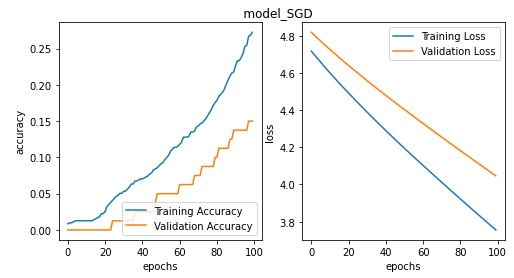

In [ ]:
# Plotting  model training accuracy and validation accuracy curves with epochs
plt.figure(figsize=(8, 4), )
plt.subplot(1, 2, 1)
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('                                                             '+name)

# Plotting  model training loss and validation loss curves with epoch
plt.subplot(1, 2, 2)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.show()

In [ ]:
r=-4*np.random.rand()
alpha=10**r
alpha

0.0015599614306904643

In [ ]:
r=-4*np.random.rand()
alpha=10**r
alpha

0.5436195343453933

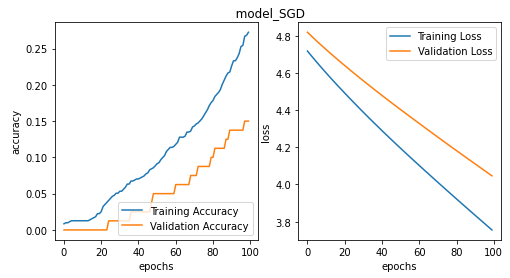

In [ ]:
# Plotting  model training accuracy and validation accuracy curves with epochs
plt.figure(figsize=(8, 4), )
plt.subplot(1, 2, 1)
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('                                                           '+name)

# Plotting  model training loss and validation loss curves with epoch
plt.subplot(1, 2, 2)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.show()

##Second Model
###We'll try using Adam optimizer

In [ ]:
model_adam, name = create_MLP_model(name='model_adam')

In [ ]:
history= train_model(model_adam, x=xtr, y=ytr,optimizer='adam')

Epoch 1/100
1/1 [==============================] - 1s 762ms/step - loss: 4.7149 - accuracy: 0.0070 - val_loss: 4.4009 - val_accuracy: 0.0000e+00
Epoch 2/100
1/1 [==============================] - 0s 50ms/step - loss: 4.4205 - accuracy: 0.0351 - val_loss: 4.2010 - val_accuracy: 0.1125
Epoch 3/100
1/1 [==============================] - 0s 60ms/step - loss: 4.1501 - accuracy: 0.1419 - val_loss: 4.0099 - val_accuracy: 0.1625
Epoch 4/100
1/1 [==============================] - 0s 47ms/step - loss: 3.8966 - accuracy: 0.2500 - val_loss: 3.8239 - val_accuracy: 0.2375
Epoch 5/100
1/1 [==============================] - 0s 48ms/step - loss: 3.6545 - accuracy: 0.3596 - val_loss: 3.6425 - val_accuracy: 0.3000
Epoch 6/100
1/1 [==============================] - 0s 49ms/step - loss: 3.4182 - accuracy: 0.4424 - val_loss: 3.4637 - val_accuracy: 0.3125
Epoch 7/100
1/1 [==============================] - 0s 67ms/step - loss: 3.1858 - accuracy: 0.5211 - val_loss: 3.2889 - val_accuracy: 0.3500
Epoch 8/100
1/1

In [ ]:
model_acc = evaluate(model_adam, x_val, y_val)

7/7 [==============================] - 0s 3ms/step - loss: 0.0805 - accuracy: 0.9848
Test results - Loss: 0.08049729466438293 - Accuracy: 0.9848484992980957%


In [ ]:
model_acc

[0.08049729466438293, 0.9848484992980957]

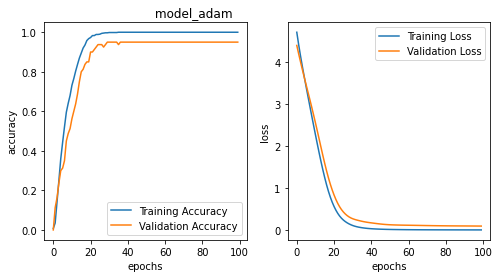

In [ ]:
# Plotting  model training accuracy and validation accuracy curves with epochs
plt.figure(figsize=(8, 4), )
plt.subplot(1, 2, 1)
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('                         '+name)

# Plotting  model training loss and validation loss curves with epoch
plt.subplot(1, 2, 2)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.show()

##Third Model
###We'll try using RMSprop optimizer

In [ ]:
model_RMSprop, name = create_MLP_model(name='RMSprop')

In [ ]:
opt=tf.keras.optimizers.RMSprop(
    name='RMSprop'
)

history= train_model(model_RMSprop, x=xtr, y=ytr,optimizer='RMSprop')

Epoch 1/100
1/1 [==============================] - 1s 933ms/step - loss: 4.6908 - accuracy: 0.0169 - val_loss: 4.1397 - val_accuracy: 0.1500
Epoch 2/100
1/1 [==============================] - 0s 48ms/step - loss: 3.9426 - accuracy: 0.2556 - val_loss: 3.7240 - val_accuracy: 0.2500
Epoch 3/100
1/1 [==============================] - 0s 48ms/step - loss: 3.3924 - accuracy: 0.4691 - val_loss: 3.3047 - val_accuracy: 0.3875
Epoch 4/100
1/1 [==============================] - 0s 48ms/step - loss: 2.8801 - accuracy: 0.6376 - val_loss: 2.8958 - val_accuracy: 0.5250
Epoch 5/100
1/1 [==============================] - 0s 49ms/step - loss: 2.3998 - accuracy: 0.7331 - val_loss: 2.5113 - val_accuracy: 0.6000
Epoch 6/100
1/1 [==============================] - 0s 59ms/step - loss: 1.9658 - accuracy: 0.8020 - val_loss: 2.1273 - val_accuracy: 0.6875
Epoch 7/100
1/1 [==============================] - 0s 48ms/step - loss: 1.6000 - accuracy: 0.8736 - val_loss: 1.8390 - val_accuracy: 0.7750
Epoch 8/100
1/1 [==

In [ ]:
model_acc = evaluate(model_RMSprop, x_val, y_val)

7/7 [==============================] - 0s 3ms/step - loss: 0.0458 - accuracy: 0.9949
Test results - Loss: 0.04579707980155945 - Accuracy: 0.9949495196342468%


In [ ]:
model_acc

[0.04579707980155945, 0.9949495196342468]

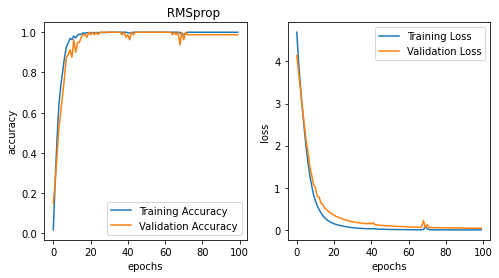

In [ ]:
# Plotting  model training accuracy and validation accuracy curves with epochs
plt.figure(figsize=(8, 4), )
plt.subplot(1, 2, 1)
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('                         '+name)

# Plotting  model training loss and validation loss curves with epoch
plt.subplot(1, 2, 2)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.show()

#Observation 1:


> It is obvious that RMSprop is the best optimizer used so far.

> It got  Training accuracy =1 and Testing accuracy= 0.9949

> This means the model has neither high variance nor high bias.



#Second, we'll tune learning rate and momentum parameters
## We'll use RMSprop as our optimizer.


First, we'll initialize random number of learning rate within range 10** - 4 and 1 and momentum within specified range 1- (10**-4 and 1)

In [ ]:
#Initialize learning rate and putting the values in a list
np.random.seed(0)

learn_rate=[]
for i in range(3):
  r=-4*np.random.rand()
  alpha=10**r
  learn_rate.append(alpha)

learn_rate

[0.006378902796357025, 0.0013779787950619286, 0.003881025495203445]

In [ ]:
#Initialize beta and putting the values in a list
np.random.seed(2)

betas=[]
for i in range(3):
  rr=-4*np.random.rand()
  beta=1-(10**rr)
  betas.append(beta)

betas

[0.9819689760004777, 0.21241928610348693, 0.993670781505084]

In [ ]:
#Define list to add histories to it
histories = []

#create a dictionary to contain model as its key and value of model as its name
dic_models = {}

#Create a loop to create several models based on all possible combinationation between momentum and learning rates
#Add values of trained models to the models dictionary
#Add each models's history to the list histories

for beta in betas:
  for alpha in learn_rate:
    model_lr_beta_ith, nameith  = create_MLP_model(name='model_lr'+'{0:.3f}'.format(alpha)+'_beta_'+'{0:.3f}'.format(beta))
    opt=tf.keras.optimizers.RMSprop( momentum = beta, learning_rate = alpha,
      name='RMSprop')
    history= train_model(model_lr_beta_ith, x=xtr, y=ytr,optimizer='RMSprop')
    dic_models[model_lr_beta_ith]= nameith
    histories.append(history)


Epoch 1/100
1/1 [==============================] - 1s 904ms/step - loss: 4.7876 - accuracy: 0.0098 - val_loss: 4.2168 - val_accuracy: 0.1250
Epoch 2/100
1/1 [==============================] - 0s 56ms/step - loss: 4.0114 - accuracy: 0.2360 - val_loss: 3.8150 - val_accuracy: 0.2500
Epoch 3/100
1/1 [==============================] - 0s 50ms/step - loss: 3.4666 - accuracy: 0.4803 - val_loss: 3.4204 - val_accuracy: 0.3375
Epoch 4/100
1/1 [==============================] - 0s 45ms/step - loss: 2.9580 - accuracy: 0.6278 - val_loss: 3.0168 - val_accuracy: 0.5375
Epoch 5/100
1/1 [==============================] - 0s 48ms/step - loss: 2.4851 - accuracy: 0.7458 - val_loss: 2.6190 - val_accuracy: 0.6250
Epoch 6/100
1/1 [==============================] - 0s 47ms/step - loss: 2.0524 - accuracy: 0.8371 - val_loss: 2.2515 - val_accuracy: 0.6750
Epoch 7/100
1/1 [==============================] - 0s 48ms/step - loss: 1.6716 - accuracy: 0.9045 - val_loss: 1.8935 - val_accuracy: 0.7625
Epoch 8/100
1/1 [==

In [ ]:
dic_models

{<keras.engine.sequential.Sequential at 0x7f25297a0c90>: 'model_lr0.004_beta_0.994',
 <keras.engine.sequential.Sequential at 0x7f25299b8ed0>: 'model_lr0.001_beta_0.994',
 <keras.engine.sequential.Sequential at 0x7f2529b47390>: 'model_lr0.006_beta_0.994',
 <keras.engine.sequential.Sequential at 0x7f252fc56190>: 'model_lr0.004_beta_0.212',
 <keras.engine.sequential.Sequential at 0x7f252fcaba90>: 'model_lr0.001_beta_0.212',
 <keras.engine.sequential.Sequential at 0x7f2532323190>: 'model_lr0.006_beta_0.212',
 <keras.engine.sequential.Sequential at 0x7f2532510850>: 'model_lr0.004_beta_0.982',
 <keras.engine.sequential.Sequential at 0x7f25325b2a50>: 'model_lr0.001_beta_0.982',
 <keras.engine.sequential.Sequential at 0x7f253285aa90>: 'model_lr0.006_beta_0.982'}

In [ ]:
model_acc = evaluate_models(dic_models, x_val, y_val)
model_acc

{'model_dropout_0.1': [0.054085928946733475, 0.9747474789619446],
 'model_dropout_0.2': [0.019132405519485474, 0.9949495196342468],
 'model_dropout_0.3': [0.015854110941290855, 0.9949495196342468],
 'model_dropout_0.4': [0.0353567972779274, 0.9898989796638489],
 'model_dropout_0.5': [0.010484476573765278, 1.0],
 'model_dropout_0.6': [0.029885035008192062, 0.9949495196342468],
 'model_dropout_0.7': [0.03375791758298874, 0.9848484992980957],
 'model_dropout_0.8': [0.022419556975364685, 0.9898989796638489]}

In [ ]:
#Dataframe made of dictionary contaning model names and their losses and accuracies
evaluation_table = {
        'Name' : list(model_acc.keys()),
        '[loss, Accuracy]' : list(model_acc.values())
    }
pd.DataFrame(evaluation_table)

,Name,"[loss, Accuracy]"
0,model_dropout_0.1,"[0.054085928946733475, 0.9747474789619446]"
1,model_dropout_0.2,"[0.019132405519485474, 0.9949495196342468]"
2,model_dropout_0.3,"[0.015854110941290855, 0.9949495196342468]"
3,model_dropout_0.4,"[0.0353567972779274, 0.9898989796638489]"
4,model_dropout_0.5,"[0.010484476573765278, 1.0]"
5,model_dropout_0.6,"[0.029885035008192062, 0.9949495196342468]"
6,model_dropout_0.7,"[0.03375791758298874, 0.9848484992980957]"
7,model_dropout_0.8,"[0.022419556975364685, 0.9898989796638489]"


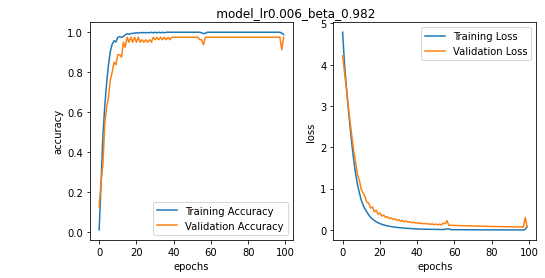

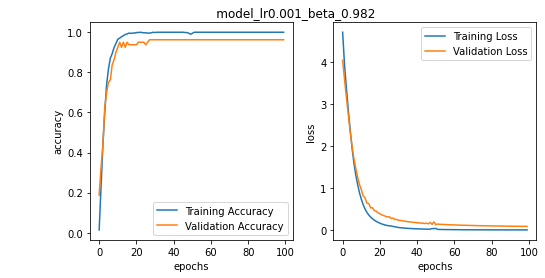

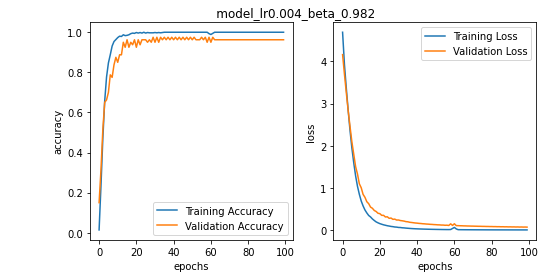

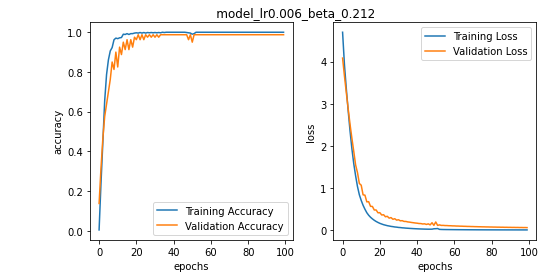

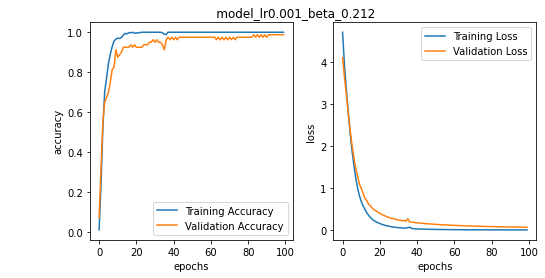

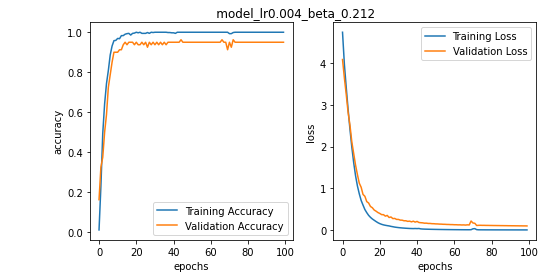

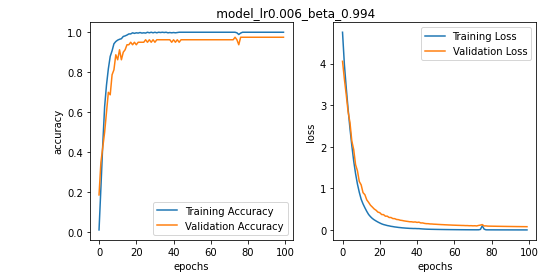

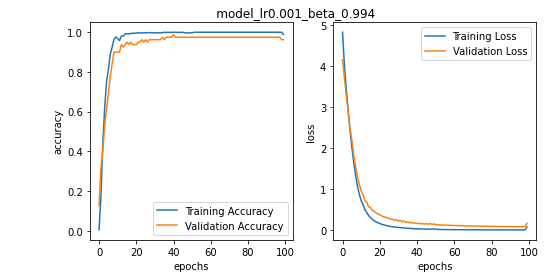

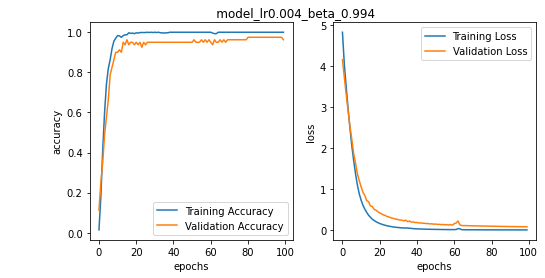

In [ ]:
for index in range(len(histories)):

  plt.figure(figsize=(8, 4), )
  plt.subplot(1, 2, 1)
  plt.xlabel('epochs')
  plt.ylabel('accuracy')
  plt.plot(histories[index].history['accuracy'], label='Training Accuracy')
  plt.plot(histories[index].history['val_accuracy'], label='Validation Accuracy')
  plt.legend(loc='lower right')
  plt.title('                                                      '+str(list(dic_models.values())[index]))
  plt.subplot(1, 2, 2)
  plt.xlabel('epochs')
  plt.ylabel('loss')
  plt.plot(histories[index].history['loss'], label='Training Loss')
  plt.plot(histories[index].history['val_loss'], label='Validation Loss')
  plt.legend(loc='upper right')
  plt.show()

#Observation 2:

Best combination of learning rate and momentum was learning rate=0.004 and momentum=0.982
Got testing accuracy 0.989899


#Third, we'll try different number of hidden units 64,128,256
We'll use RMSprop optimizer
momentum= the first value of momentum list (betas[0])


learning rate=The first value of learning rate(learn_rate[0])

As both were the best combination got test accuracy = 0.9898

##First model

we'll try hidden_size1=64 and hidden_size2=64

In [ ]:
model_hidden_units2, name = create_MLP_model(name='RMSprop',hidden_size1=64,hidden_size2=64)

In [ ]:
opt=tf.keras.optimizers.RMSprop(
    name='RMSprop'
)

history= train_model(model_hidden_units2, x=xtr, y=ytr,optimizer='RMSprop')

Epoch 1/100
1/1 [==============================] - 1s 910ms/step - loss: 4.7570 - accuracy: 0.0211 - val_loss: 4.4378 - val_accuracy: 0.0500
Epoch 2/100
1/1 [==============================] - 0s 40ms/step - loss: 4.5271 - accuracy: 0.0520 - val_loss: 4.3215 - val_accuracy: 0.0500
Epoch 3/100
1/1 [==============================] - 0s 41ms/step - loss: 4.3770 - accuracy: 0.0857 - val_loss: 4.2259 - val_accuracy: 0.0750
Epoch 4/100
1/1 [==============================] - 0s 44ms/step - loss: 4.2485 - accuracy: 0.1039 - val_loss: 4.1365 - val_accuracy: 0.1125
Epoch 5/100
1/1 [==============================] - 0s 41ms/step - loss: 4.1289 - accuracy: 0.1292 - val_loss: 4.0544 - val_accuracy: 0.1250
Epoch 6/100
1/1 [==============================] - 0s 41ms/step - loss: 4.0154 - accuracy: 0.1517 - val_loss: 3.9685 - val_accuracy: 0.1375
Epoch 7/100
1/1 [==============================] - 0s 44ms/step - loss: 3.9040 - accuracy: 0.1742 - val_loss: 3.8855 - val_accuracy: 0.1875
Epoch 8/100
1/1 [==

In [ ]:
model_acc = evaluate(model_hidden_units2, x_val, y_val)

7/7 [==============================] - 0s 3ms/step - loss: 0.1948 - accuracy: 0.9444
Test results - Loss: 0.1947711557149887 - Accuracy: 0.9444444179534912%


In [ ]:
model_acc

[0.1947711557149887, 0.9444444179534912]

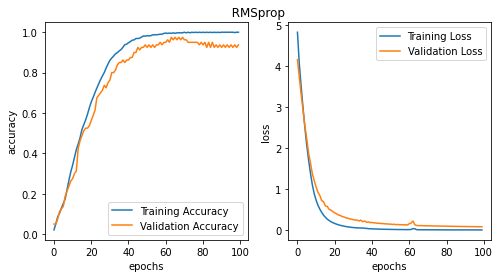

In [ ]:
# Plotting  model training accuracy and validation accuracy curves with epochs
plt.figure(figsize=(8, 4), )
plt.subplot(1, 2, 1)
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('                                                          '+name)

# Plotting  model training loss and validation loss curves with epoch
plt.subplot(1, 2, 2)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.plot(histories[index].history['loss'], label='Training Loss')
plt.plot(histories[index].history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.show()

##Second model

we'll try hidden_size1=128 and hidden_size2=64

In [ ]:
model_hidden_units, name = create_MLP_model(name='RMSprop',hidden_size1=128,hidden_size2=64)

In [ ]:
opt=tf.keras.optimizers.RMSprop(
    name='RMSprop'
)

history= train_model(model_hidden_units, x=xtr, y=ytr,optimizer='RMSprop')

Epoch 1/100
1/1 [==============================] - 1s 929ms/step - loss: 4.8235 - accuracy: 0.0056 - val_loss: 4.5811 - val_accuracy: 0.0500
Epoch 2/100
1/1 [==============================] - 0s 38ms/step - loss: 4.4874 - accuracy: 0.0393 - val_loss: 4.4212 - val_accuracy: 0.0875
Epoch 3/100
1/1 [==============================] - 0s 43ms/step - loss: 4.2795 - accuracy: 0.0871 - val_loss: 4.2836 - val_accuracy: 0.1000
Epoch 4/100
1/1 [==============================] - 0s 60ms/step - loss: 4.1022 - accuracy: 0.1573 - val_loss: 4.1680 - val_accuracy: 0.1250
Epoch 5/100
1/1 [==============================] - 0s 39ms/step - loss: 3.9410 - accuracy: 0.2219 - val_loss: 4.0565 - val_accuracy: 0.1375
Epoch 6/100
1/1 [==============================] - 0s 38ms/step - loss: 3.7894 - accuracy: 0.2697 - val_loss: 3.9522 - val_accuracy: 0.1500
Epoch 7/100
1/1 [==============================] - 0s 47ms/step - loss: 3.6409 - accuracy: 0.3062 - val_loss: 3.8474 - val_accuracy: 0.2000
Epoch 8/100
1/1 [==

In [ ]:
model_acc = evaluate(model_hidden_units, x_val, y_val)

7/7 [==============================] - 0s 3ms/step - loss: 0.1264 - accuracy: 0.9697
Test results - Loss: 0.1264282464981079 - Accuracy: 0.9696969985961914%


In [ ]:
model_acc

[0.1264282464981079, 0.9696969985961914]

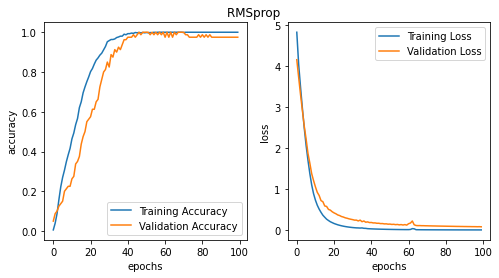

In [ ]:
# Plotting  model training accuracy and validation accuracy curves with epochs
plt.figure(figsize=(8, 4), )
plt.subplot(1, 2, 1)
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('                                                        '+name)

# Plotting  model training loss and validation loss curves with epoch
plt.subplot(1, 2, 2)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.plot(histories[index].history['loss'], label='Training Loss')
plt.plot(histories[index].history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.show()

##Third model

we'll try hidden_size1=256 and hidden_size2=64

In [ ]:
model_hidden_units3, name = create_MLP_model(name='RMSprop',hidden_size1=256,hidden_size2=64)

In [ ]:
opt=tf.keras.optimizers.RMSprop(
    name='RMSprop'
)

history= train_model(model_hidden_units3, x=xtr, y=ytr,optimizer='RMSprop')

Epoch 1/100
1/1 [==============================] - 1s 923ms/step - loss: 4.8437 - accuracy: 0.0098 - val_loss: 4.3681 - val_accuracy: 0.0250
Epoch 2/100
1/1 [==============================] - 0s 48ms/step - loss: 4.3382 - accuracy: 0.0463 - val_loss: 4.1391 - val_accuracy: 0.0750
Epoch 3/100
1/1 [==============================] - 0s 46ms/step - loss: 4.0233 - accuracy: 0.1390 - val_loss: 3.9566 - val_accuracy: 0.1500
Epoch 4/100
1/1 [==============================] - 0s 45ms/step - loss: 3.7526 - accuracy: 0.2331 - val_loss: 3.7553 - val_accuracy: 0.2125
Epoch 5/100
1/1 [==============================] - 0s 44ms/step - loss: 3.5013 - accuracy: 0.3272 - val_loss: 3.5818 - val_accuracy: 0.2875
Epoch 6/100
1/1 [==============================] - 0s 48ms/step - loss: 3.2625 - accuracy: 0.4017 - val_loss: 3.3916 - val_accuracy: 0.3500
Epoch 7/100
1/1 [==============================] - 0s 46ms/step - loss: 3.0337 - accuracy: 0.5098 - val_loss: 3.2326 - val_accuracy: 0.3125
Epoch 8/100
1/1 [==

In [ ]:
model_acc = evaluate(model_hidden_units3, x_val, y_val)

7/7 [==============================] - 0s 3ms/step - loss: 0.1162 - accuracy: 0.9848
Test results - Loss: 0.1162480041384697 - Accuracy: 0.9848484992980957%


In [ ]:
model_acc

[0.1162480041384697, 0.9848484992980957]

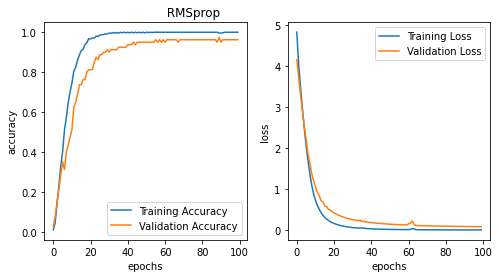

In [ ]:
# Plotting  model training accuracy and validation accuracy curves with epochs
plt.figure(figsize=(8, 4), )
plt.subplot(1, 2, 1)
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('                         '+name)

# Plotting  model training loss and validation loss curves with epoch
plt.subplot(1, 2, 2)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.plot(histories[index].history['loss'], label='Training Loss')
plt.plot(histories[index].history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.show()

#Observation 3:
As the number of hidden layers increased, the model was able to extract more features from the data set and the accuracy in the testing set increase and the loss decrease.

Best values hidden size 1= 256.

Loss: 0.1162 - Accuracy: 0.9848

#Fourth, we are going to change the mini batch size
We'll try mini batch sizes 32,64,128, and the whole training examples existing in the dataset (xtr.shape[0])

In [ ]:
# A list of mini batch sizes used (They are powers of two)
batch_size=[32,64,128,xtr.shape[0]]

We'll make a loop to train diffrent models and get the values of the trained models at once.


In [ ]:
# opt=tf.keras.optimizers.RMSprop(
#     name='RMSprop'
# )
#Define list to add histories to it
histories = []

#create a dictionary to contain model as its key and value of model as its name
dic_models = {}

#Create a loop to create several models based on batch size we want to use
#Add values of trained models to the models dictionary
#Add each models's history to the list histories
for batch in batch_size:
  model_minibatch_ith, nameith  = create_MLP_model(name='model_minibatch_'+str(batch))
  history= train_model(model_minibatch_ith, x=xtr, y=ytr,optimizer='RMSprop', batch_size=batch)
  dic_models[model_minibatch_ith]= nameith
  histories.append(history)


Epoch 1/100
23/23 [==============================] - 1s 15ms/step - loss: 3.4728 - accuracy: 0.3230 - val_loss: 2.4634 - val_accuracy: 0.4625
Epoch 2/100
23/23 [==============================] - 0s 6ms/step - loss: 1.2294 - accuracy: 0.8301 - val_loss: 1.0739 - val_accuracy: 0.8500
Epoch 3/100
23/23 [==============================] - 0s 6ms/step - loss: 0.3995 - accuracy: 0.9579 - val_loss: 0.5160 - val_accuracy: 0.9125
Epoch 4/100
23/23 [==============================] - 0s 6ms/step - loss: 0.1523 - accuracy: 0.9831 - val_loss: 0.2713 - val_accuracy: 0.9625
Epoch 5/100
23/23 [==============================] - 0s 6ms/step - loss: 0.0676 - accuracy: 0.9944 - val_loss: 0.1999 - val_accuracy: 0.9625
Epoch 6/100
23/23 [==============================] - 0s 6ms/step - loss: 0.0389 - accuracy: 0.9958 - val_loss: 0.1365 - val_accuracy: 0.9750
Epoch 7/100
23/23 [==============================] - 0s 5ms/step - loss: 0.0203 - accuracy: 0.9972 - val_loss: 0.1259 - val_accuracy: 0.9625
Epoch 8/100


In [ ]:
dic_models

{<keras.engine.sequential.Sequential at 0x7f253bc9e750>: 'model_minibatch_64',
 <keras.engine.sequential.Sequential at 0x7f253bcb1fd0>: 'model_minibatch_32',
 <keras.engine.sequential.Sequential at 0x7f253c78b310>: 'model_minibatch_128',
 <keras.engine.sequential.Sequential at 0x7f253cb27f10>: 'model_minibatch_792'}

In [ ]:
model_acc_mb = evaluate_models(dic_models, x_val, y_val)
model_acc_mb


{'model_minibatch_128': [0.04959934577345848, 0.9696969985961914],
 'model_minibatch_32': [0.0786101371049881, 0.9848484992980957],
 'model_minibatch_64': [0.04862344637513161, 0.9797979593276978],
 'model_minibatch_792': [0.043491560965776443, 0.9898989796638489]}

In [ ]:
evaluation_table = {
        'Name' : list(model_acc_mb.keys()),
        '[loss, Accuracy]' : list(model_acc_mb.values())
    }
pd.DataFrame(evaluation_table)

,Name,"[loss, Accuracy]"
0,model_minibatch_32,"[0.0786101371049881, 0.9848484992980957]"
1,model_minibatch_64,"[0.04862344637513161, 0.9797979593276978]"
2,model_minibatch_128,"[0.04959934577345848, 0.9696969985961914]"
3,model_minibatch_792,"[0.043491560965776443, 0.9898989796638489]"


In [ ]:
model_acc

[0.1162480041384697, 0.9848484992980957]

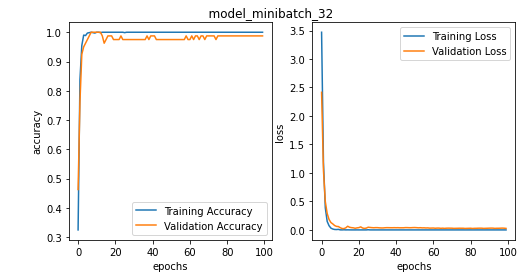

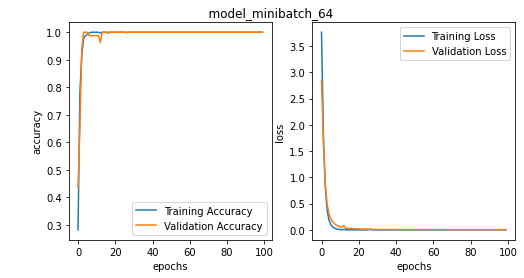

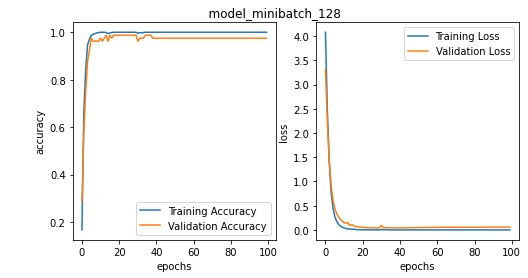

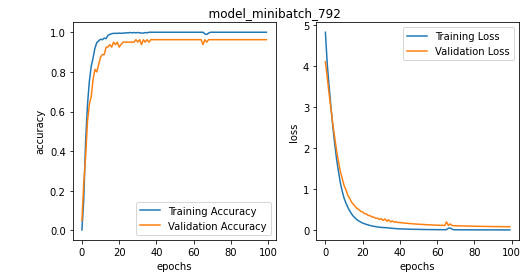

In [ ]:
for index in range(len(histories)):

  plt.figure(figsize=(8, 4), )
  plt.subplot(1, 2, 1)
  plt.xlabel('epochs')
  plt.ylabel('accuracy')
  plt.plot(histories[index].history['accuracy'], label='Training Accuracy')
  plt.plot(histories[index].history['val_accuracy'], label='Validation Accuracy')
  plt.legend(loc='lower right')
  plt.title('                                                    '+str(list(dic_models.values())[index]))
  plt.subplot(1, 2, 2)
  plt.xlabel('epochs')
  plt.ylabel('loss')
  plt.plot(histories[index].history['loss'], label='Training Loss')
  plt.plot(histories[index].history['val_loss'], label='Validation Loss')
  plt.legend(loc='upper right')
  plt.show()

#Observation 4:

{'model_minibatch_128': 0.9848484992980957,
 'model_minibatch_32': 1.0,
 'model_minibatch_64': 0.9797979593276978,
 'model_minibatch_792': 0.9797979593276978}

We can observe that:
1. At mini batch 32 we got test accuracy:   1.0
2. At mini batch 64 we got test accuracy: 0.9797
3. At mini batch 128 we got test accuracy: 0.9848
4. batch size equals the whole training examples in the training data we got test accuracy: 0.9797 which is the exact same testing accuracing as when using batch size =64

> Using mini batch size is relative according to the problem and data.


#Fifth we'll try dropout regularization layers

As mention in project requirments, we will add one dropout layer after hidden layer with different keep prop values **[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8]**


We will use mini batch size of 64

In [ ]:
#Initialize a list containing keep prop values
keep_props=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8]

In [ ]:
#Define list to add histories to it
histories = []

#create a dictionary to contain model as its key and value of model as its name
dic_models = {}

#Create a loop to create several models based on batch size we want to use
#Add values of trained models to the models dictionary
#Add each models's history to the list histories
for keep_prop in keep_props:
  model_keepProp_ith, nameith  = create_MLP_model(name='model_dropout_'+str(keep_prop), dropout1=True, keep_prop1=keep_prop)
  history= train_model(model_keepProp_ith, x=xtr, y=ytr,optimizer='RMSprop', batch_size = 64)
  dic_models[model_keepProp_ith]= nameith
  histories.append(history)

Epoch 1/100
12/12 [==============================] - 1s 35ms/step - loss: 3.8419 - accuracy: 0.2205 - val_loss: 2.8808 - val_accuracy: 0.4125
Epoch 2/100
12/12 [==============================] - 0s 14ms/step - loss: 1.9684 - accuracy: 0.7107 - val_loss: 1.6562 - val_accuracy: 0.6500
Epoch 3/100
12/12 [==============================] - 0s 15ms/step - loss: 0.9473 - accuracy: 0.8792 - val_loss: 0.8808 - val_accuracy: 0.8625
Epoch 4/100
12/12 [==============================] - 0s 16ms/step - loss: 0.4711 - accuracy: 0.9522 - val_loss: 0.4825 - val_accuracy: 0.9375
Epoch 5/100
12/12 [==============================] - 0s 16ms/step - loss: 0.2551 - accuracy: 0.9789 - val_loss: 0.3175 - val_accuracy: 0.9625
Epoch 6/100
12/12 [==============================] - 0s 17ms/step - loss: 0.1580 - accuracy: 0.9860 - val_loss: 0.2263 - val_accuracy: 0.9750
Epoch 7/100
12/12 [==============================] - 0s 17ms/step - loss: 0.0896 - accuracy: 0.9944 - val_loss: 0.1594 - val_accuracy: 0.9750
Epoch 

In [ ]:
dic_models

{<keras.engine.sequential.Sequential at 0x7f253b667450>: 'model_dropout_0.7',
 <keras.engine.sequential.Sequential at 0x7f253bed5bd0>: 'model_dropout_0.8',
 <keras.engine.sequential.Sequential at 0x7f253cb3e0d0>: 'model_dropout_0.4',
 <keras.engine.sequential.Sequential at 0x7f253d435110>: 'model_dropout_0.6',
 <keras.engine.sequential.Sequential at 0x7f253e495390>: 'model_dropout_0.3',
 <keras.engine.sequential.Sequential at 0x7f253e7cf850>: 'model_dropout_0.2',
 <keras.engine.sequential.Sequential at 0x7f253eca0950>: 'model_dropout_0.1',
 <keras.engine.sequential.Sequential at 0x7f25419afe90>: 'model_dropout_0.5'}

In [ ]:
model_acc_do = evaluate_models(dic_models, x_val, y_val)
model_acc_do


{'model_dropout_0.1': [0.023718437179923058, 0.9848484992980957],
 'model_dropout_0.2': [0.03099655918776989, 0.9949495196342468],
 'model_dropout_0.3': [0.04521040618419647, 0.9797979593276978],
 'model_dropout_0.4': [0.016789883375167847, 0.9898989796638489],
 'model_dropout_0.5': [0.07805099338293076, 0.9696969985961914],
 'model_dropout_0.6': [0.032822925597429276, 0.9797979593276978],
 'model_dropout_0.7': [0.032621268182992935, 0.9898989796638489],
 'model_dropout_0.8': [0.024530639871954918, 0.9898989796638489]}

In [ ]:
evaluation_table = {
        'Name' : list(model_acc_do.keys()),
        '[loss, Accuracy]' : list(model_acc_do.values())
    }
pd.DataFrame(evaluation_table)

,Name,"[loss, Accuracy]"
0,model_dropout_0.1,"[0.023718437179923058, 0.9848484992980957]"
1,model_dropout_0.2,"[0.03099655918776989, 0.9949495196342468]"
2,model_dropout_0.3,"[0.04521040618419647, 0.9797979593276978]"
3,model_dropout_0.4,"[0.016789883375167847, 0.9898989796638489]"
4,model_dropout_0.5,"[0.07805099338293076, 0.9696969985961914]"
5,model_dropout_0.6,"[0.032822925597429276, 0.9797979593276978]"
6,model_dropout_0.7,"[0.032621268182992935, 0.9898989796638489]"
7,model_dropout_0.8,"[0.024530639871954918, 0.9898989796638489]"


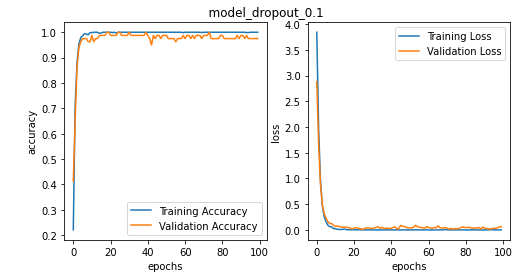

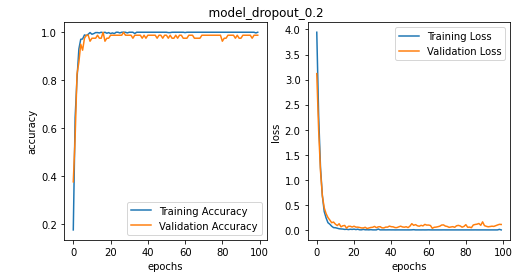

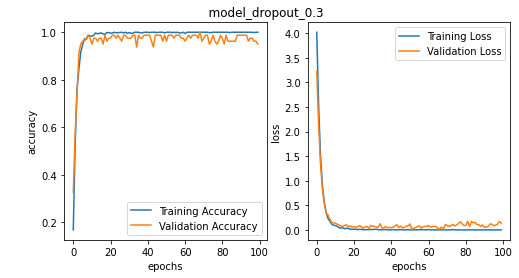

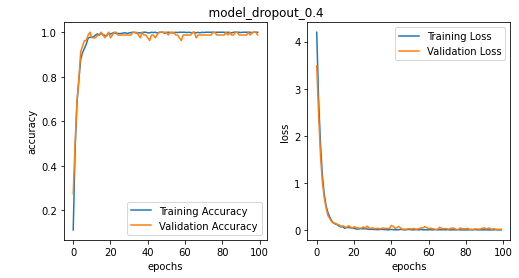

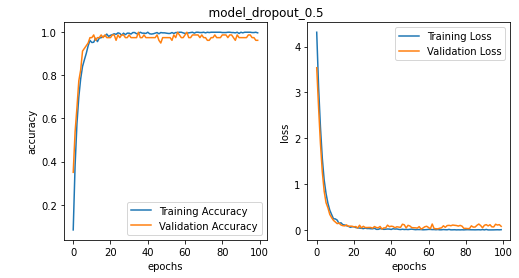

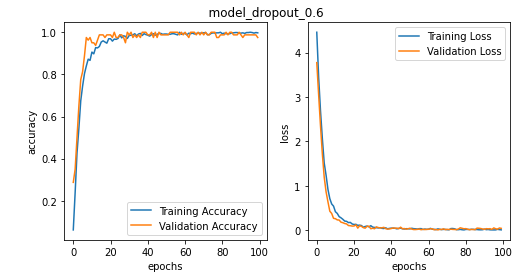

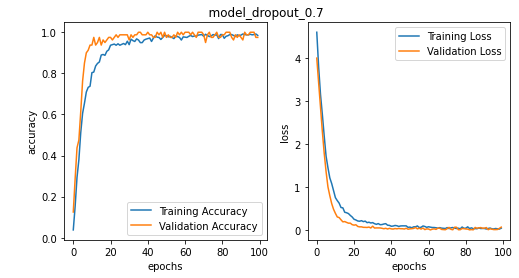

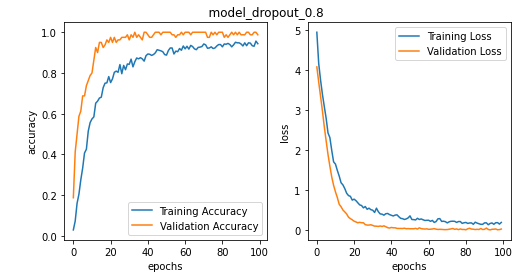

In [ ]:
for index in range(len(histories)):

  plt.figure(figsize=(8, 4), )
  plt.subplot(1, 2, 1)
  plt.xlabel('epochs')
  plt.ylabel('accuracy')
  plt.plot(histories[index].history['accuracy'], label='Training Accuracy')
  plt.plot(histories[index].history['val_accuracy'], label='Validation Accuracy')
  plt.legend(loc='lower right')
  plt.title('                                                    '+str(list(dic_models.values())[index]))
  plt.subplot(1, 2, 2)
  plt.xlabel('epochs')
  plt.ylabel('loss')
  plt.plot(histories[index].history['loss'], label='Training Loss')
  plt.plot(histories[index].history['val_loss'], label='Validation Loss')
  plt.legend(loc='upper right')
  plt.show()

#Observation 5:

> It is obvious that keep_prop of value 0.5 is the best keep probability rate for dropout regularization for the model and got test accuracy $1!$

> This means if we remove 50 percent of the first hidden layer we will get the highest testing accuracy= $1$.




